In [8]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("mobile_price_train.csv")
data_test = pd.read_csv("mobile_price_test.csv")
data_test = data_test.drop(labels=["id"], axis=1)

In [9]:
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


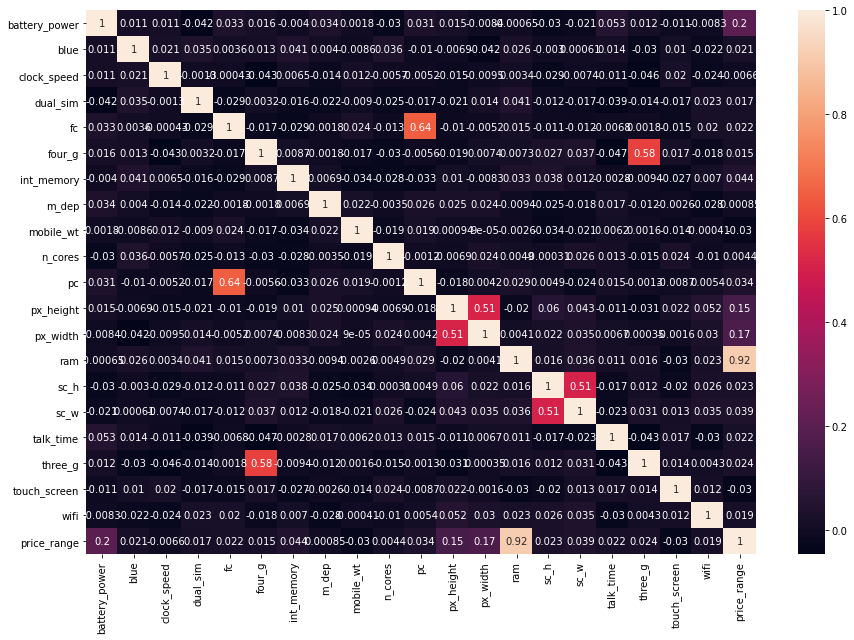

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sn.heatmap(data_train.corr(), annot=True)
plt.show()

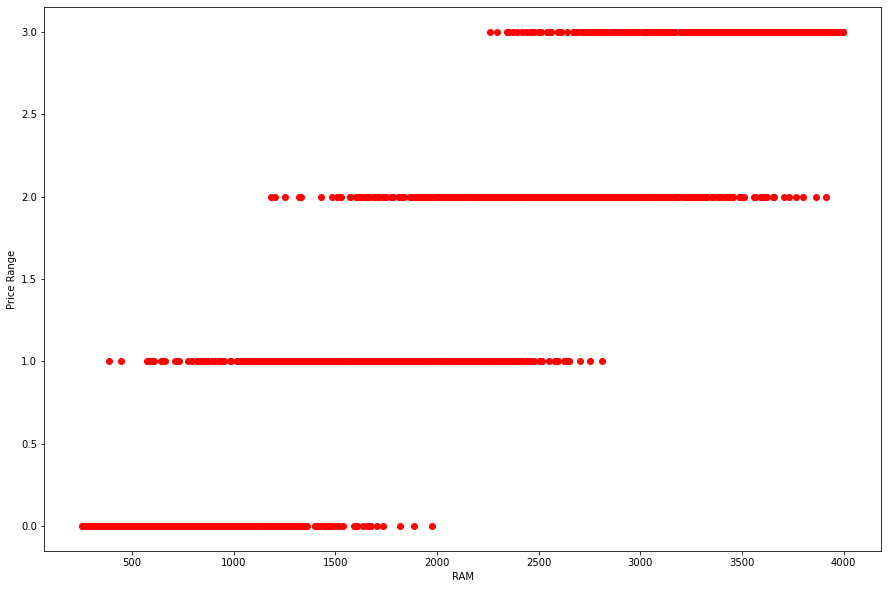

In [35]:
figure = plt.figure(figsize=(15,10))
plt.plot(data_train['ram'], data_train['price_range'], 'ro')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

In [38]:
data_train['ram'].describe()['min']

256.0

In [52]:
minRam = data_train['ram'].describe()['min']
maxRam = data_train['ram'].describe()['max']

print(data_train.loc[data_train['ram'] <= maxRam ].describe()['ram']['count'], "\n")

2000.0 



In [93]:
ranges = [[minRam, 500], [501,1000], [1001, 1500], [1501,2500],[2501,3500],[3501,maxRam]]
counts = pd.DataFrame(columns=[132, 266, 283, 530, 519, 270])
count = [0,0,0,0,0,0]
idx = 0
for j in ranges:
    count[idx] = {'0.0':0, '1.0':0, '2.0':0, '3.0':0}
    for i, data in data_train.iterrows():
        if j[0] <= data['ram'] <= j[1]:
            count[idx][str(data['price_range'])] += 1 
    print(j, ' = ', count, "\n")
    idx += 1


[256.0, 500]  =  [{'0.0': 130, '1.0': 2, '2.0': 0, '3.0': 0}, 0, 0, 0, 0, 0] 

[501, 1000]  =  [{'0.0': 130, '1.0': 2, '2.0': 0, '3.0': 0}, {'0.0': 235, '1.0': 31, '2.0': 0, '3.0': 0}, 0, 0, 0, 0] 

[1001, 1500]  =  [{'0.0': 130, '1.0': 2, '2.0': 0, '3.0': 0}, {'0.0': 235, '1.0': 31, '2.0': 0, '3.0': 0}, {'0.0': 118, '1.0': 157, '2.0': 8, '3.0': 0}, 0, 0, 0] 

[1501, 2500]  =  [{'0.0': 130, '1.0': 2, '2.0': 0, '3.0': 0}, {'0.0': 235, '1.0': 31, '2.0': 0, '3.0': 0}, {'0.0': 118, '1.0': 157, '2.0': 8, '3.0': 0}, {'0.0': 17, '1.0': 292, '2.0': 209, '3.0': 12}, 0, 0] 

[2501, 3500]  =  [{'0.0': 130, '1.0': 2, '2.0': 0, '3.0': 0}, {'0.0': 235, '1.0': 31, '2.0': 0, '3.0': 0}, {'0.0': 118, '1.0': 157, '2.0': 8, '3.0': 0}, {'0.0': 17, '1.0': 292, '2.0': 209, '3.0': 12}, {'0.0': 0, '1.0': 18, '2.0': 266, '3.0': 235}, 0] 

[3501, 3998.0]  =  [{'0.0': 130, '1.0': 2, '2.0': 0, '3.0': 0}, {'0.0': 235, '1.0': 31, '2.0': 0, '3.0': 0}, {'0.0': 118, '1.0': 157, '2.0': 8, '3.0': 0}, {'0.0': 17, '1.0': 2